# The routers data set (single-label, multiclass classification)

(in this example I do not use one_to_hot)

In [1]:
from keras.datasets import reuters
import numpy as np

from keras import models
from keras import layers

import matplotlib.pyplot as plt
import copy

from collections import Counter

Using TensorFlow backend.


### load data

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### explore data

In [3]:
train_data.shape

(8982,)

In [4]:
test_data.shape

(2246,)

In [5]:
train_data[0][:6]

[1, 2, 2, 8, 43, 10]

In [6]:
train_labels[:6]

array([3, 4, 3, 4, 4, 4])

In [7]:
np.unique(train_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [8]:
len(np.unique(train_labels))

46

### back to english

In [9]:
word_index = reuters.get_word_index()

In [10]:
dict(list(word_index.items())[:4])

{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803}

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
review0 = [reverse_word_index.get(i - 3, '?') for i in train_data[0]]

In [13]:
decoded_newswire = ' '.join(review0)

# preparing data

### features

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
x_train.shape

(8982, 10000)

In [17]:
x_train[:3]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

### labels

(instead of one_to_hot, just cast them as integer tensor and use as loss 'sparse_categorical_crossentropy')

In [18]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [19]:
train_labels[:5]

array([3, 4, 3, 4, 4])

In [20]:
y_train[:5]

array([3, 4, 3, 4, 4])

In [21]:
type(train_labels)

numpy.ndarray

In [22]:
type(y_train)

numpy.ndarray

### Model

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [24]:
# model = models.Sequential()
# model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(46, activation='softmax'))

Note here 64>46 , otherwise one can lose information

In [25]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### validation sample

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Fit

In [27]:
%%time

history = model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 156us/step - loss: 2.5333 - acc: 0.4959 - val_loss: 1.7247 - val_acc: 0.6110
Epoch 2/9
7982/7982 [==============================] - 1s 120us/step - loss: 1.4486 - acc: 0.6870 - val_loss: 1.3481 - val_acc: 0.7070
Epoch 3/9
7982/7982 [==============================] - 1s 117us/step - loss: 1.0971 - acc: 0.7642 - val_loss: 1.1714 - val_acc: 0.7420
Epoch 4/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.8702 - acc: 0.8160 - val_loss: 1.0794 - val_acc: 0.7600
Epoch 5/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.7036 - acc: 0.8483 - val_loss: 0.9848 - val_acc: 0.7800
Epoch 6/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.5669 - acc: 0.8799 - val_loss: 0.9414 - val_acc: 0.8030
Epoch 7/9
7982/7982 [==============================] - 1s 118us/step - loss: 0.4601 - acc: 0.9027 - val_loss: 0.9103 - val_acc: 0.8000
Epoch 8

### Plots

In [28]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

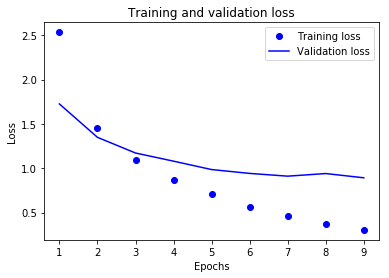

In [29]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

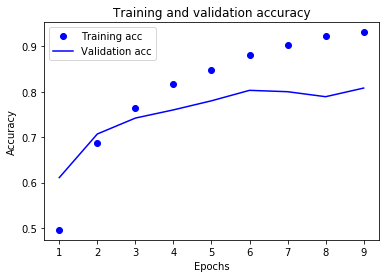

In [30]:
#plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### evaluate on the test set

In [31]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 78us/step


In [32]:
results

[0.9814232996501566, 0.786731967996086]

### determine the probability for a random choice

In [33]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1803205699020481

### Prediction

In [34]:
predictions = model.predict(x_test)

In [35]:
x_test.shape

(2246, 10000)

In [36]:
predictions.shape

(2246, 46)

In [37]:
predictions[0]

array([1.5514423e-05, 7.7170051e-05, 2.0194859e-06, 8.6921746e-01,
       1.2214182e-01, 1.8988981e-06, 1.4299577e-05, 7.6112883e-05,
       2.0985641e-03, 3.0015379e-05, 2.0988041e-04, 4.5767118e-04,
       2.3201465e-04, 4.3559248e-06, 1.4020164e-05, 1.5024882e-05,
       7.5538474e-04, 1.1200413e-04, 7.8558704e-05, 4.6040572e-04,
       2.2181980e-03, 4.6114286e-04, 1.3267430e-05, 1.1287230e-05,
       9.0477268e-05, 1.5720912e-05, 6.0720572e-07, 4.4715958e-05,
       2.3581450e-04, 2.1606220e-05, 3.2606858e-04, 9.9873323e-06,
       1.3590461e-04, 1.0519401e-05, 1.6876095e-04, 1.0143604e-05,
       6.3454390e-05, 8.2232491e-06, 3.7069527e-05, 2.0041496e-05,
       1.8507641e-05, 2.8074081e-05, 2.4098239e-05, 3.2521330e-06,
       8.3693158e-06, 3.2921585e-07], dtype=float32)

In [38]:
sum(predictions[0])

0.9999998351860597

In [39]:
np.max(predictions[0]), np.argmax(predictions[0]) #probability and topic

(0.86921746, 3)